<a href="https://colab.research.google.com/github/suti333/Crop-Disease.io/blob/main/Crop_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the Dataset



In [2]:
!wget https://www.dropbox.com/s/r6zdqqtpo7qfetu/Crop%20Disease%20Dataset.zip?dl=0

--2022-07-09 10:13:33--  https://www.dropbox.com/s/r6zdqqtpo7qfetu/Crop%20Disease%20Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/r6zdqqtpo7qfetu/Crop%20Disease%20Dataset.zip [following]
--2022-07-09 10:13:33--  https://www.dropbox.com/s/raw/r6zdqqtpo7qfetu/Crop%20Disease%20Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3902ba0d8d62599ec641514555.dl.dropboxusercontent.com/cd/0/inline/BotDnkM052i_rhZPbvrOPboFZZy6cOJ2h-goLvJ50tuBGdUYVioQZIll-EGFlsSpIWi2XheulUMOB1Po7OvsBzYS4UEtRUFCB7MvOi52QRhnChSAg4XwJ-lQ2eVQXGSB_zZl39Ts3GOGEWnFYFRg5lxnKhs9cmx615pzUJhMAta-Ig/file# [following]
--2022-07-09 10:13:34--  https://uc3902ba0d8d62599ec641514555.dl.dropboxusercontent.com/cd/0/inline/BotDnkM052i_

## Unzipping the Dataset

In [3]:
!unzip Crop\ Disease\ Dataset.zip\?dl\=0

Streaming output truncated to the last 5000 lines.
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a75e41ac-5944-4698-876b-1d0716934982___GCREC_Bact.Sp 5970.JPG  
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a75ed4a7-c1c6-4c44-ab20-61326f59021b___GCREC_Bact.Sp 3587.JPG  
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a7609a35-fd75-4ec3-868a-eb97b9ffd096___FREC_Scab 3032_new30degFlipLR.JPG  
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a768a3ed-74df-4223-a9ec-9c58663d2323___RS_GLSp 4496 copy_new30degFlipLR.jpg  
  inflating: Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Unhealthy/a76ebe42-b9c1-4848-8b89-b62ef6e1a91c__

/bin/bash: pylab: command not found


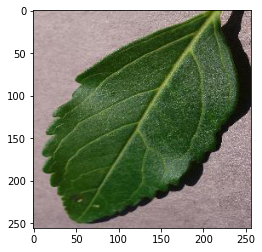

In [4]:
!pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG')
imgplot = plt.imshow(img)
plt.show()

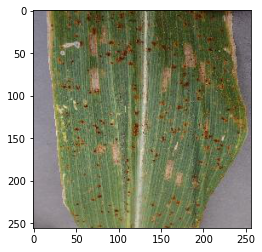

In [5]:
img = mpimg.imread('/content/Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Unhealthy/038464d1-47a9-4169-afb1-72c87e568a95___RS_GLSp 4480.JPG')
imgplot = plt.imshow(img)
plt.show()

## Importing Libraries

In [6]:
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import backend as K
from tensorflow.keras.optimizers import Adam

## Initializing Constants

In [7]:
EPOCHS = 10
INITIAL_LR = 1e-4
BATCH_SIZE = 32
width = 256
height = 256
depth = 3

In [8]:
train_dir = '/content/Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
validation_dir = '/content/Crop Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

## Checking Shape of Image

In [9]:
inputShape = (height, width, depth)
chanDim=-1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

## Image Data Generation

In [10]:
train_gen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1.0/255)

In [11]:
train_generator = train_gen.flow_from_directory(train_dir, target_size=(width, height), batch_size=BATCH_SIZE, class_mode='binary', classes=['Healthy', 'Unhealthy'])
validation_generator = test_gen.flow_from_directory(validation_dir, target_size=(width, height), batch_size=BATCH_SIZE, class_mode='binary')

Found 70295 images belonging to 2 classes.
Found 17572 images belonging to 2 classes.


## Visual Representation of Image Data Generation

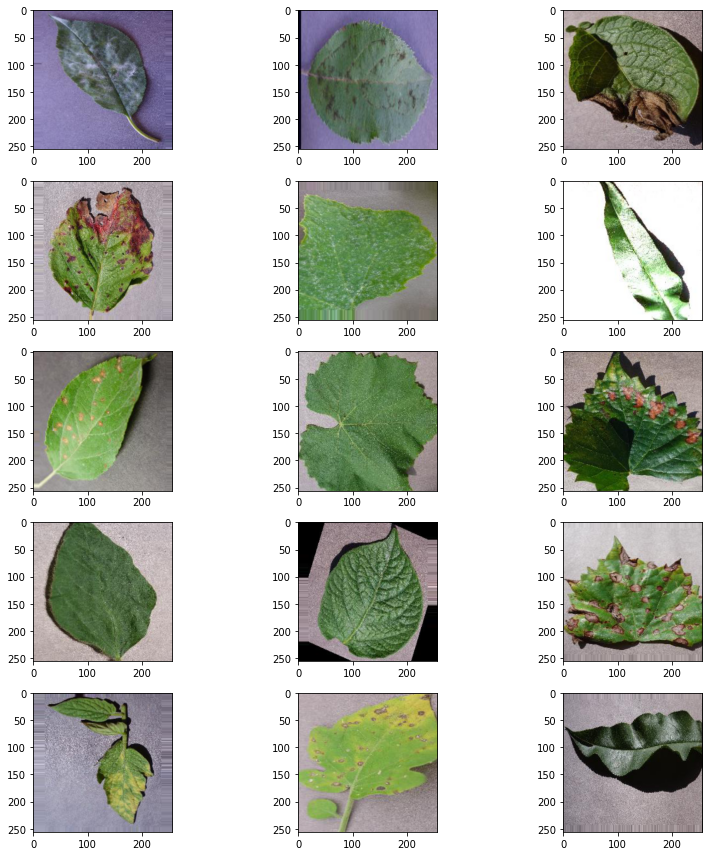

In [12]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for x_batch, y_batch in train_generator:
        img = x_batch[0]
        plt.imshow(img)
        break
plt.tight_layout()
plt.show()

## Modelling

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=inputShape))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(3, 3))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(3, 3))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(3, 3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1568,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        1

## Compiling the Model

In [14]:
opt = Adam(learning_rate=INITIAL_LR, decay=INITIAL_LR/EPOCHS)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        1

## Fitting the Model

In [ ]:
history = model.fit_generator(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS, verbose=1
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
   4/2197 [..............................] - ETA: 5:58:24 - loss: 4.1994 - accuracy: 0.5156

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
print("Train Accuracy  : {:.2f} %".format(acc[-1]*100))

## Saving the Model

In [ ]:
pickle.dump(model, open('cnn_model.pkl', 'wb'))